In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sample-sales-data/sales_data_sample.csv


In [5]:
# importing the libraries for plots
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
#reading and loading the csv into dataframe
df_sales = pd.read_csv('/kaggle/input/sample-sales-data/sales_data_sample.csv', encoding = 'latin')
df_sales

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [7]:
# Numbers of columns and rows in the dataframe
df_sales.shape

(2823, 25)

In [8]:
# name of the columns in the dataframe
df_sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [9]:
# describe the numerical columns in the dataframe
df_sales.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [10]:
# info about the dataframe
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [11]:
# Cleaning the data set , removing the columns with max na values
df_sales_clean = df_sales.drop('STATE', axis=1)
df_sales_clean.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NaN,NYC,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,NaN,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,NaN,Pasadena,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,6505551386,7734 Strong St.,NaN,San Francisco,NaN,USA,NaN,Brown,Julie,Medium


In [12]:
# information about the dataframe 
df_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [13]:
# checking how many na values in every column of the dataframe
df_sales_clean.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [14]:
# converting datatype of data column from object to datetime
df_sales_clean['ORDERDATE'] = pd.to_datetime(df_sales_clean['ORDERDATE'])
 

In [15]:
# checking null values in a dataframe
df_sales.isnull()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


In [16]:
# checking the sum of null values in the dataframe
df_sales.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [17]:
# unique values check for a column
df_sales.TERRITORY.unique()

array([nan, 'EMEA', 'APAC', 'Japan'], dtype=object)

<Axes: >

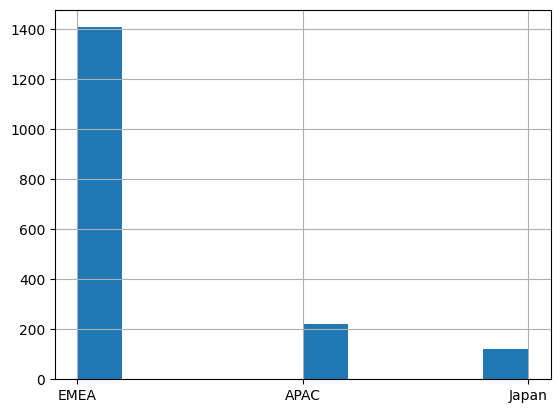

In [18]:
df_sales.TERRITORY.hist()

In [19]:
# to check the max value in a column
df_sales['QUANTITYORDERED'].max()

97

In [20]:
# to check duplcated values
df_sales.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2818    False
2819    False
2820    False
2821    False
2822    False
Length: 2823, dtype: bool

In [21]:
# sorting the values in asc or desc orderof a column
df_sales.sort_values(by = 'SALES', ascending = False).head(20).reset_index()

,index,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,598,10407,76,100.0,2,14082.80,4/22/2005 0:00,On Hold,2,4,...,3086 Ingle Ln.,NaN,San Jose,CA,94217,USA,NaN,Frick,Sue,Large
1,744,10322,50,100.0,6,12536.50,11/4/2004 0:00,Shipped,4,11,...,2304 Long Airport Avenue,NaN,Nashua,NH,62005,USA,NaN,Young,Valarie,Large
2,53,10424,50,100.0,6,12001.00,5/31/2005 0:00,In Process,2,5,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
3,1062,10412,60,100.0,9,11887.80,5/3/2005 0:00,Shipped,2,5,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Large
4,104,10403,66,100.0,9,11886.60,4/8/2005 0:00,Shipped,2,4,...,Berkeley Gardens 12 Brewery,NaN,Liverpool,NaN,WX1 6LT,UK,EMEA,Devon,Elizabeth,Large
5,1995,10405,76,100.0,3,11739.70,4/14/2005 0:00,Shipped,2,4,...,"24, place Kluber",NaN,Strasbourg,NaN,67000,France,EMEA,Citeaux,Frederique,Large
6,44,10312,48,100.0,3,11623.70,10/21/2004 0:00,Shipped,4,10,...,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Large
7,1133,10333,46,100.0,2,11336.70,11/18/2004 0:00,Shipped,4,11,...,5557 North Pendale Street,NaN,San Francisco,CA,NaN,USA,NaN,Murphy,Julie,Large
8,188,10127,46,100.0,2,11279.20,6/3/2003 0:00,Shipped,2,6,...,4092 Furth Circle,Suite 400,NYC,NY,10022,USA,NaN,Young,Jeff,Large
9,30,10150,45,100.0,8,10993.50,9/19/2003 0:00,Shipped,3,9,...,"Bronz Sok., Bronz Apt. 3/6 Tesvikiye",NaN,Singapore,NaN,79903,Singapore,Japan,Natividad,Eric,Large


In [22]:
# unique values for column productline
df_sales.PRODUCTLINE.unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [23]:
# Count of values for different products in column productline
df_sales['PRODUCTLINE'].value_counts()

PRODUCTLINE
Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: count, dtype: int64

In [24]:
# groupby and agg function used 
group_sales= df_sales.groupby('PRODUCTLINE')[['QUANTITYORDERED','PRICEEACH','SALES']].max()
group_sales

,QUANTITYORDERED,PRICEEACH,SALES
PRODUCTLINE,,,
Classic Cars,97,100.0,12001.00
Motorcycles,66,100.0,11886.60
Planes,85,100.0,10066.60
Ships,55,100.0,6960.48
Trains,51,100.0,8977.05
Trucks and Buses,70,100.0,8844.12
Vintage Cars,76,100.0,14082.80


In [25]:
#checking rows with nan values
sales_df1 = df_sales.loc[(df_sales['TERRITORY']!='EMEA')& (df_sales['TERRITORY']!='APAC')& (df_sales['TERRITORY']!='Japan')]
sales_df1.COUNTRY.unique()

array(['USA', 'Canada'], dtype=object)

In [26]:
# replacing nan values in column with values nan
df_sales_clean['TERRITORY']=df_sales_clean['TERRITORY'].fillna('North America')
 

In [27]:
df_sales_clean['TERRITORY']= df_sales_clean['TERRITORY'].replace('Japan','APAC')

In [28]:
#replacing values
df_sales['TERRITORY']=df_sales['TERRITORY'].replace('Japan','APAC')
 

In [29]:
#another way to check sum of nan values 
df_sales_clean["TERRITORY"].isna().sum()
 

0

#### Visualizations

In [47]:
# Unique country names and their value count 
country_sorted=df_sales_clean['COUNTRY'].value_counts().sort_values().reset_index()
country_sorted

,COUNTRY,count
0,Ireland,16
1,Philippines,26
2,Switzerland,31
3,Belgium,33
4,Japan,52
5,Austria,55
6,Sweden,57
7,Germany,62
8,Denmark,63
9,Canada,70


In [ ]:
#Bar plot for the different countries and their count 
sns.set_theme(style='whitegrid')
plt.figure(figsize=(16,6))
sns.barplot(data=country_sorted, x='COUNTRY', y='count', color='Cyan', label='Count of countries')
plt.xticks(rotation=45)
plt.legend()
plt.show()
plt.clf()

#### Bar plot using seaborn and code for Top countries(10/20) for sales 

In [ ]:
# Top countries by sales value
country_sales = df_sales_clean.groupby('COUNTRY') ['SALES'].sum().reset_index()
country_sales
top_countries = country_sales.sort_values(by='SALES', ascending=False).head(10)
top_countries

In [ ]:
#Bar plot for top 10 countries for max sales
# Set the style 
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=top_countries, x='COUNTRY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df_sales_clean.info()

In [ ]:
Territory_sales = df_sales_clean.groupby('TERRITORY') ['SALES'].sum().reset_index()
Territory_sales

In [ ]:
df_sales_clean['YEAR_ID'].unique()

In [ ]:
# What are the total sales over the past years?
sales_year = df_sales_clean.groupby('YEAR_ID') ['SALES'].sum().reset_index()
sales_year

In [ ]:
# What are the total sales over the past year?
total_sales_past_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2005]['SALES'].sum()
total_sales_past_year

#### Bar plot 

In [ ]:
plt.figure(figsize=(6, 3))

# Create the bar plot
plt.bar(sales_year['YEAR_ID'], sales_year['SALES'], width = 0.3,color='orange', label='Sales')

# Title of the plot
plt.title("A bar plot for sales over the years")

# Add labels to the axes
plt.xlabel("Years")
plt.ylabel("Sales Amount")

# Add grid
plt.grid()

# Add legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Which product has the highest sales?
sales_product = df_sales_clean.groupby('PRODUCTLINE') ['SALES'].sum().reset_index()
sales_product

#### Bar plot for sales of the products
##### Adding data lables to the chart
In this code, the for loop iterates over each bar in the plot, retrieves its height using bar.get_height(), and places a text label at the top center of each bar using plt.text. The ha and va parameters are used to horizontally and vertically align the text.

In [ ]:
plt.figure(figsize=(10, 5))

# Create the bar plot
bars = plt.bar(sales_product['PRODUCTLINE'], sales_product['SALES'], width = 0.3,color='Teal', label='Sales')

# Title of the plot
plt.title("A bar plot for sales of the products")

# Add labels to the axes
plt.xlabel("Product")
plt.ylabel("Sales Amount")

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Add grid

# Add legend
plt.legend()

# Show the plot
plt.show()

#### Pie Chart of Sales Distribution by Product Line


In [ ]:
# Create the figure
plt.figure(figsize=(5, 5))

# Create the pie chart
plt.pie(sales_product['SALES'], labels=sales_product['PRODUCTLINE'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title of the plot
plt.title("Sales Distribution by Product Line")

# Show the plot
plt.show()

####  Box Plot of Sales by Product Line


In [ ]:
# Create the figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df_sales_clean, palette='Set3')

# Title of the plot
plt.title("Sales Distribution by Product Line")

# Add labels to the axes
plt.xlabel("Product Line")
plt.ylabel("Sales")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

#### Heatmap of Sales by Month and Product Line


In [ ]:
# Pivot the data
sales_heatmap = df_sales_clean.pivot_table(values='SALES', index='PRODUCTLINE', columns='MONTH_ID', aggfunc='sum')
sales_heatmap

In [ ]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(sales_heatmap, annot=True, fmt=".1f", cmap='YlGnBu')

# Title of the plot
plt.title("Heatmap of Sales by Month and Product Line")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Product Line")

# Show the plot
plt.show()

In [ ]:
yearly_sales = df_sales_clean.pivot_table(values='SALES', index='TERRITORY', columns='YEAR_ID', aggfunc='sum')
yearly_sales

In [ ]:
yearly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Sales of Product by Year')
plt.xlabel('Territory')
plt.ylabel('Total Sales')
plt.legend(title='Territory vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [ ]:
product_sales = df_sales_clean.pivot_table(values='SALES', index='PRODUCTLINE', columns='YEAR_ID', aggfunc='sum')
product_sales

In [ ]:
product_sales.plot(kind='bar', figsize=(12,6))
plt.title('Sales of Product by Years')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.legend(title='Product vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [30]:
product_sales_mean = df_sales_clean.pivot_table(values='SALES', index='PRODUCTLINE', columns='YEAR_ID',aggfunc=['sum', 'mean', 'max', 'min'])
product_sales_mean                
    


ERROR! Session/line number was not unique in database. History logging moved to new session 2


sum                                mean               \
YEAR_ID                 2003        2004       2005         2003         2004   
PRODUCTLINE                                                                     
Classic Cars      1484785.29  1762257.09  672573.28  4056.790410  3987.006991   
Motorcycles        370895.58   560545.23  234947.53  3402.711743  3417.958720   
Planes             272257.60   502671.80  200074.17  3203.030588  3122.185093   
Ships              244821.09   341437.97  128178.07  3022.482593  2969.025826   
Trains              72802.29   116523.85   36917.33  2600.081786  3149.293243   
Trucks and Buses   420429.93   529302.89  178057.02  3822.090273  3727.485141   
Vintage Cars       650987.76   911423.77  340739.31  2945.645973  3209.238627   

                                    max                          min           \
YEAR_ID                  2005      2003      2004      2005     2003     2004   
PRODUCTLINE                                                                     
Classic Cars      4230.020629  11279.20  11623.70  12001.00   717.40   813.20   
Motorcycles       4050.819483   9264.86   9774.03  11886.60  1035.58   651.80   
Planes            3334.569500   7483.98   8160.30  10066.60   875.91   948.99   
Ships             3373.107105   6341.21   6960.48   6397.44  1134.00  1089.36   
Trains            3076.444167   5344.50   6490.88   8977.05   972.40  1056.40   
Trucks and Buses  3633.816735   7083.00   8844.12   8498.00  1103.76   728.40   
Vintage Cars      3340.581471   7956.46  12536.50  14082.80   710.20   577.60   

                           
YEAR_ID              2005  
PRODUCTLINE                
Classic Cars       640.05  
Motorcycles        733.11  
Planes            1122.40  
Ships             1463.00  
Trains            1193.04  
Trucks and Buses   482.13  
Vintage Cars       541.14

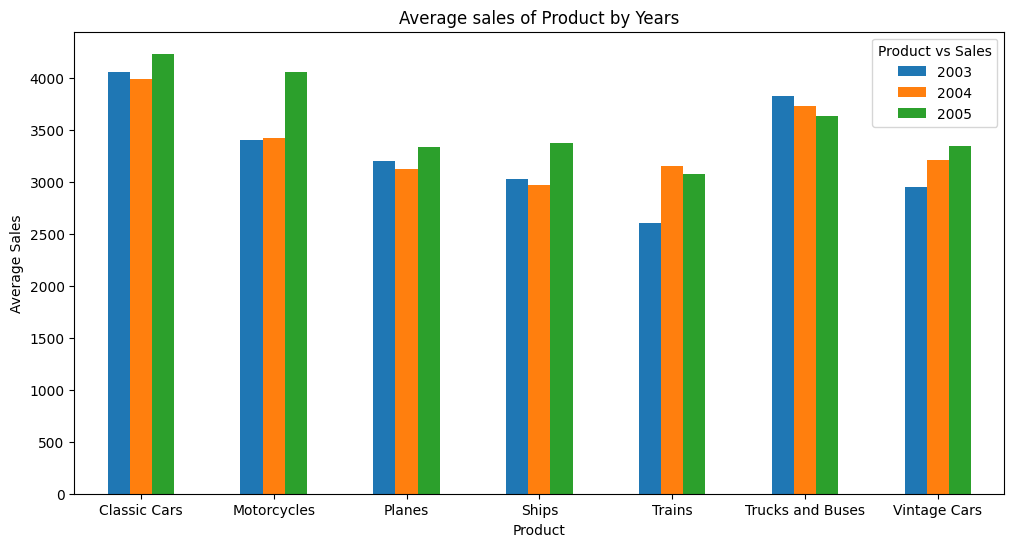

In [32]:
product_sales_mean['mean'].plot(kind='bar', figsize=(12,6))
plt.title('Average sales of Product by Years')
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.legend(title='Product vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [34]:
product_sales_terr = df_sales_clean.pivot_table(values='SALES', index='PRODUCTLINE', columns='TERRITORY',aggfunc=['sum', 'mean', 'max', 'min'])
product_sales_terr                
    

sum                                   mean  \
TERRITORY              APAC        EMEA North America         APAC   
PRODUCTLINE                                                          
Classic Cars      426359.56  2086994.66    1406261.44  4022.260000   
Motorcycles       138742.45   503096.70     524549.19  3226.568605   
Planes            144937.70   476122.91     353942.96  3150.819565   
Ships              37175.30   427264.68     249997.15  3379.572727   
Trains             18483.73   138506.18      69253.56  2310.466250   
Trucks and Buses  179695.62   498305.82     449788.40  3906.426522   
Vintage Cars      255900.69   848981.46     798268.69  3120.740122   

                                                  max                          \
TERRITORY                EMEA North America      APAC      EMEA North America   
PRODUCTLINE                                                                     
Classic Cars      4028.947220   4099.887580  10993.50  12001.00      11623.70   
Motorcycles       3645.628261   3496.994600   9774.03  11886.60       8339.80   
Planes            3071.760710   3370.885333   7483.98  10039.60      10066.60   
Ships             3073.846619   2976.156548   5189.78   6804.63       6960.48   
Trains            3147.867727   2770.142400   5344.50   8977.05       5808.48   
Trucks and Buses  3923.667874   3513.971875   8470.14   8844.12       8209.44   
Vintage Cars      2968.466643   3340.036360  10758.00   9720.00      14082.80   

                      min                         
TERRITORY            APAC     EMEA North America  
PRODUCTLINE                                       
Classic Cars       859.14   640.05        717.40  
Motorcycles       1035.58   733.11        651.80  
Planes            1063.65   948.99        875.91  
Ships             1089.36  1146.50       1134.00  
Trains            1033.41  1056.40        972.40  
Trucks and Buses  1228.20   482.13       1167.25  
Vintage Cars       553.95   577.60        541.14

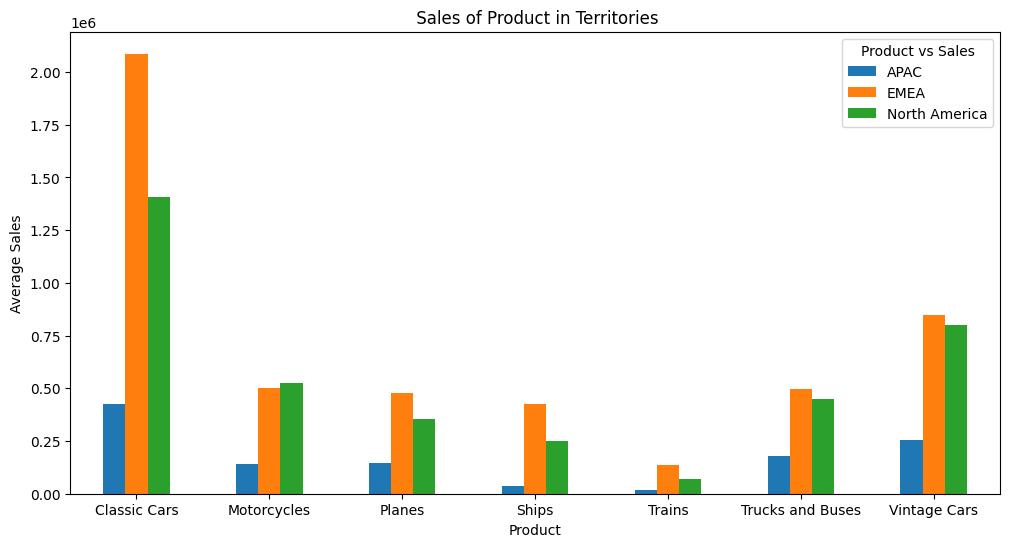

In [36]:
product_sales_terr['sum'].plot(kind='bar', figsize=(12,6))
plt.title(' Sales of Product in Territories')
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.legend(title='Product vs Sales')
plt.xticks(rotation=0, ha='center')
plt.show()

In [38]:
df_sales_clean.head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,2125557818,897 Long Airport Avenue,NaN,NYC,10022,USA,North America,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,26.47.1555,59 rue de l'Abbaye,NaN,Reims,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,6265557265,78934 Hillside Dr.,NaN,Pasadena,90003,USA,North America,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,6505551386,7734 Strong St.,NaN,San Francisco,NaN,USA,North America,Brown,Julie,Medium


In [ ]:
# What is the average order value?
order_average = df_sales_clean.groupby('ORDERNUMBER') ['QUANTITYORDERED'].mean().reset_index()
order_average
top_orders = order_average.sort_values(by='QUANTITYORDERED', ascending=False).head(20)
top_orders

In [ ]:
count1 = df_sales_clean['ORDERNUMBER'].nunique()
count1

In [ ]:
df_sales_clean.columns

####  Bar plot for the avarage order value for top order id's.

In [ ]:
# Create the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
bars1 = plt.bar(top_orders['ORDERNUMBER'].astype(str), top_orders['QUANTITYORDERED'], color='skyblue')

# Title of the plot
plt.title("Top 20 Order Numbers by Average Quantity Ordered")

# Add labels to the axes
plt.xlabel("Order Number")
plt.ylabel("Average Quantity Ordered")

#Add data labels
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add grid
plt.grid(True)
plt.show()

##### How many unique customers made purchases?
- The unique function in pandas is used to find unique values in a Series, but it doesn’t directly help with grouping and summing quantities. 
- unique_customers will contain an array of unique customer names.
- customer_order_sum will be a DataFrame with each customer and their total quantity ordered.

In [ ]:
customer_order_sum = df_sales_clean.groupby('CUSTOMERNAME')['QUANTITYORDERED'].sum().reset_index()
customer_order_sum

In [ ]:
top_cust = customer_order_sum.sort_values(by='QUANTITYORDERED', ascending=False).head(20)
top_cust

In [ ]:
# Create the figure
plt.figure(figsize=(12, 6))

# Create the bar plot
bars2 = plt.bar(top_cust['CUSTOMERNAME'].astype(str), top_cust['QUANTITYORDERED'], color='#FFC305')

# Title of the plot
plt.title("Top 20 Customer Names by  Quantity Ordered")

# Add labels to the axes
plt.xlabel("Customer Name")
plt.ylabel("Total Quantity Ordered")

#Add data labels
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')



# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Sales trend over the months for last year.

In [ ]:
 #Filter data for the past year
sales_past_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2005]

# Group by month and sum sales
monthly_sales_trend = sales_past_year.groupby('MONTH_ID')['SALES'].sum().reset_index()


In [ ]:
df_sales_clean['YEAR_ID'].unique()

### Line Plot of Monthly Sales Trend

####  Adding data labels to your chart:-
##### In this code, the for loop iterates over each data point in the monthly_sales_trend DataFrame. The **plt.text** function is used to place the labels at the coordinates specified by the MONTH_ID and SALES columns. The ha (horizontal alignment) and va (vertical alignment) parameters ensure the labels are centered and positioned just above each data point.

In [ ]:
plt.figure(figsize=(10, 6))

# Plot the sales trend
plt.plot(monthly_sales_trend['MONTH_ID'], monthly_sales_trend['SALES'], marker='o', linestyle='-', color='y')

# Title of the plot
plt.title("Sales Trend Over the Past Year")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Sales Amount")

for i in range(len(monthly_sales_trend)):
    plt.text(monthly_sales_trend['MONTH_ID'][i], monthly_sales_trend['SALES'][i], 
             round(monthly_sales_trend['SALES'][i], 2), ha='center', va='bottom')


# Add grid
plt.grid(True)



In [ ]:
region_2005 = sales_past_year.groupby('TERRITORY')['SALES'].sum().reset_index()
region_2005

In [ ]:
df_sales_clean.TERRITORY.unique()

In [ ]:
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(8,4))

#create the histogram
sns.barplot(data=region_2005, x='TERRITORY', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales in Territiries in 2005', fontsize=16)
ax.set_xlabel('Territory', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
## sales trend for year 2004
sales_pas_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2004]

# Group by month and sum sales
month_sales_trend = sales_pas_year.groupby('MONTH_ID')['SALES'].sum().reset_index()

In [ ]:
plt.figure(figsize=(16, 6))

# Plot the sales trend
plt.plot(month_sales_trend['MONTH_ID'], month_sales_trend['SALES'], marker='*', linestyle='-', color='r')

# Title of the plot
plt.title("Sales Trend Over the 2004")

# Add labels to the axes
plt.xlabel("Month")
plt.ylabel("Sales Amount")

for i in range(len(monthly_sales_trend)):
    plt.text(month_sales_trend['MONTH_ID'][i], month_sales_trend['SALES'][i], 
             round(monthly_sales_trend['SALES'][i], 2), ha='center', va='bottom')
# Add grid
plt.grid(True)

In [ ]:
#regional sales in 2004
region_2004 = sales_pas_year.groupby('TERRITORY')['SALES'].sum().reset_index()
region_2004

#### sales trend over months for year = 2003
- bar plot by using seaborn

In [ ]:
## sales trend for year 2003
sale_year = df_sales_clean[df_sales_clean['YEAR_ID'] == 2003]

# Group by month and sum sales
month_sale_trend = sale_year.groupby('MONTH_ID')['SALES'].sum().reset_index()
month_sale_trend

In [ ]:
sns.set_theme(style="darkgrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(12,6))

#create the histogram
sns.barplot(data=month_sale_trend, x='MONTH_ID', y='SALES', ax=ax, palette='viridis')

# Customize the plot
ax.set_title('Sales by month id in 2003', fontsize=16)
ax.set_xlabel('month id', fontsize=12)
ax.set_ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='center')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# regional sales for year 2003
region_2003 = sale_year.groupby('TERRITORY')['SALES'].sum().reset_index()

In [40]:
# - How do sales vary by order size?

sales_by_dealsize = df_sales_clean.groupby('DEALSIZE')['SALES'].sum().reset_index()
sales_by_dealsize

,DEALSIZE,SALES
0,Large,1302119.26
1,Medium,6087432.24
2,Small,2643077.35


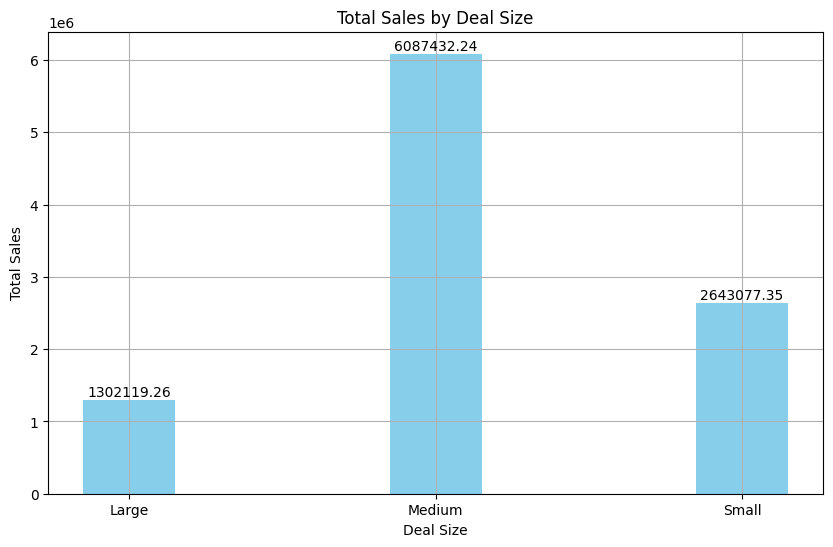

In [44]:
plt.figure(figsize=(10, 6))

# Create the bar plot
plot1 = plt.bar(sales_by_dealsize['DEALSIZE'], sales_by_dealsize['SALES'], color='skyblue', width = 0.3)

# Title of the plot
plt.title("Total Sales by Deal Size")

# Add labels to the axes
plt.xlabel("Deal Size")
plt.ylabel("Total Sales")

for bar in plot1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')


# Add grid
plt.grid(True)

# Show the plot
plt.show()


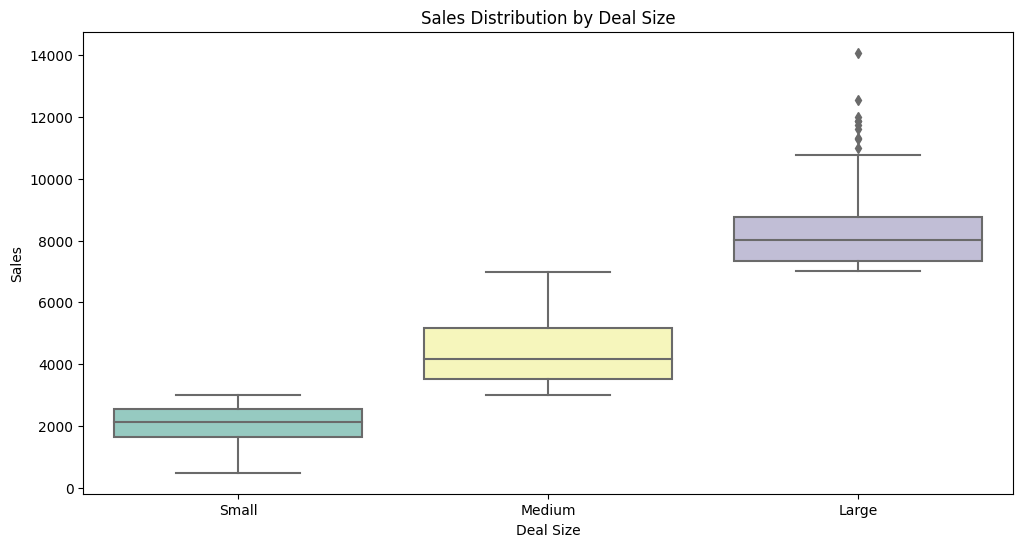

In [46]:
plt.figure(figsize=(12, 6))

# Create the box plot
plot2 =sns.boxplot(x='DEALSIZE', y='SALES', data=df_sales_clean, palette='Set3')

# Title of the plot
plt.title("Sales Distribution by Deal Size")

# Add labels to the axes
plt.xlabel("Deal Size")
plt.ylabel("Sales")




# Show the plot
plt.show()


In [49]:
df_sales_clean.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'POSTALCODE', 'COUNTRY',
       'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')